Simulation for : 

1. Section 2.5 :  Generating Points Uniformly at Random on the Surface of
a Sphere

2. Section 2.6 : Gaussians in High Dimension

In [1]:
#Setup
import numpy as np
import sympy as sp
import scipy.integrate
import math
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial
sp.init_printing()

Pdf of High Dimensional Spherical Gaussian 

In [2]:
def prob(r,d,sigma=1,pi=math.pi,e=math.e):
    return (1/((2*pi)**(d/2)*(sigma**d)))*e**(-1*(r**2)/(2*(sigma**2)))

print("\npdf(r,sigma,d)=")
prob(sp.Symbol('r'),sp.Symbol('d'),sp.Symbol('sigma'),sp.pi,sp.Symbol('e'))


pdf(r,sigma,d)=


A(r,d) = Surface Area of d-dim r-radius sphere

In [3]:
def A(r,d,pi=math.pi,e=math.e):
    return ((pi**(d/2))/(0.5*gamma(d/2)))*r**(d-1)
print("\nA(r,d=6)=")
A(sp.Symbol('r'),6,sp.pi,sp.Symbol('e'))


A(r,d=6)=


Volume 
$$V(r) = \int_{0}^{r}A(d,x) dx $$

Probability Mass 
$$pm(R) = \int_{0}^{R}p(r) d(V(r)) $$

$$\implies pm(R) = \int_{0}^{R}p(r) A(d,r) dr $$

In [4]:
def integ(d,R,N=int(1e6),sigma=1):
    val = scipy.integrate.quad(lambda r : prob(r,d,sigma)*A(r,d), 0, R, epsabs=1.49e-08, epsrel=1.49e-08, limit=N)
    return val[0]    

Plots for Probability Mass v/s d-Dimensions for Various R,Sigma

In [5]:
def get_p_mass(sigma,R,N):
    d_vals = np.arange(2,101,dtype=np.int32)
    pmass_vals = np.array([integ(d,R,N=N,sigma=1) for d in d_vals])
    return d_vals,pmass_vals

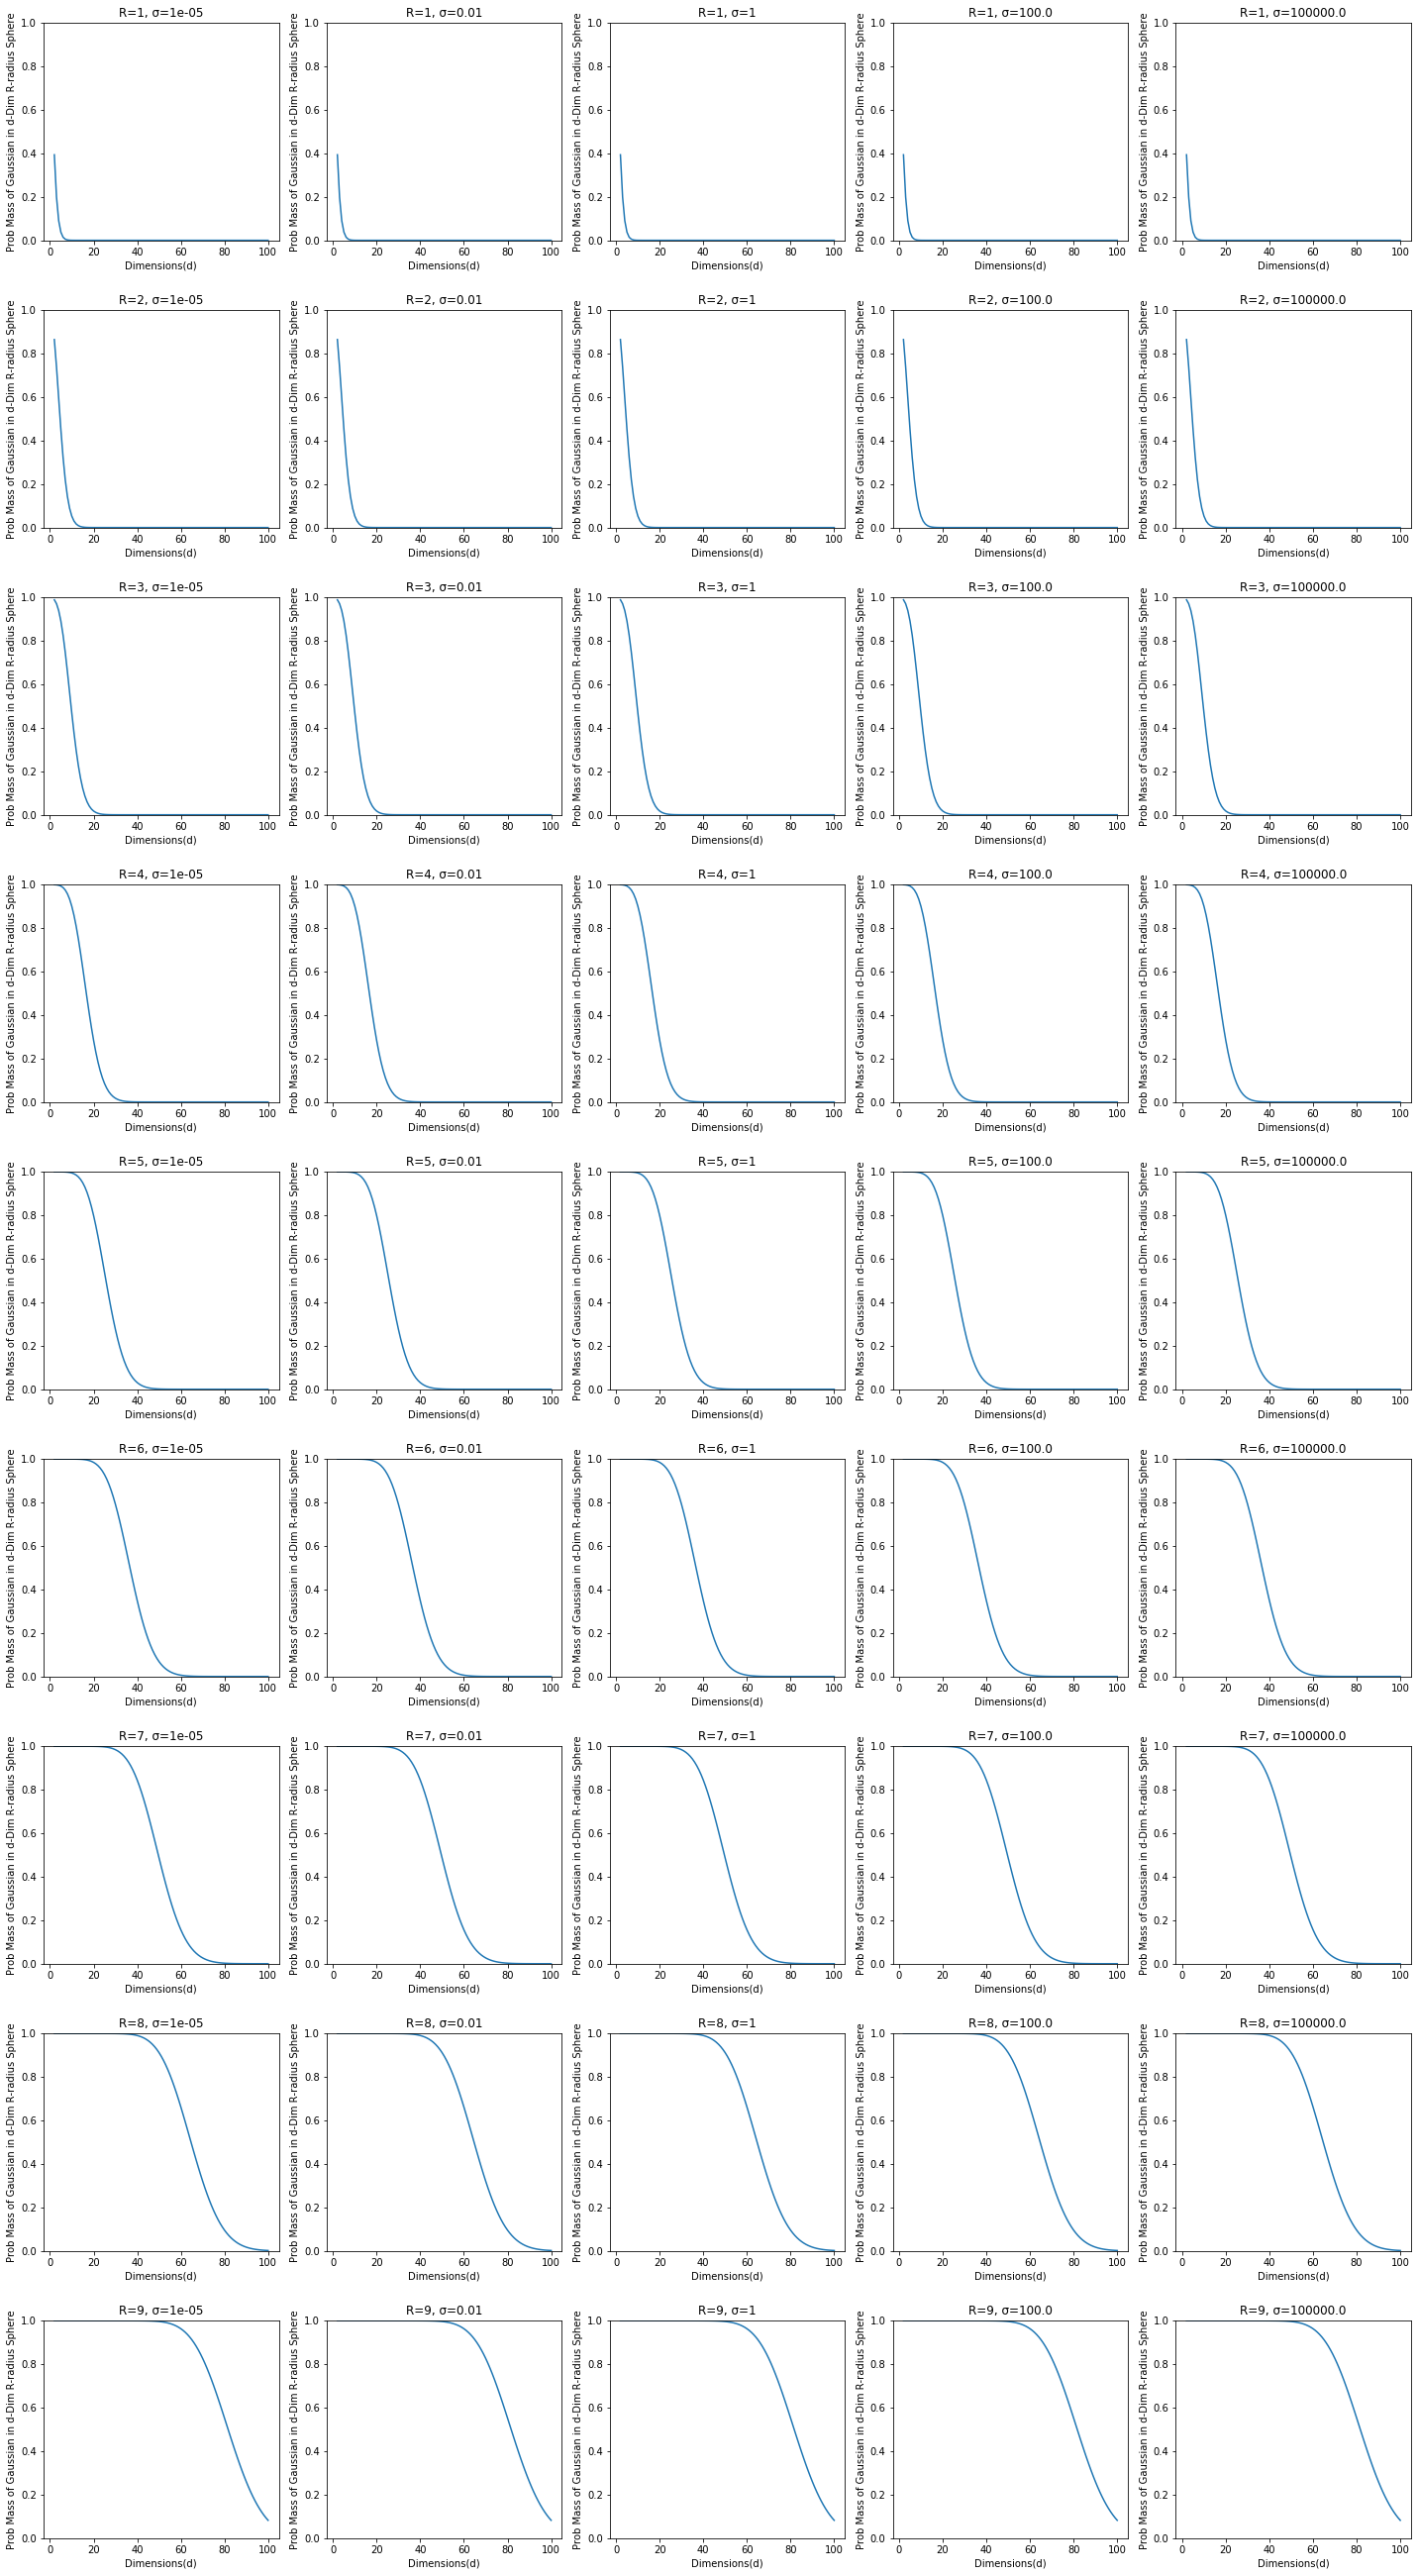

In [13]:
sigma_vals = [1e-5,1e-2,1,1e2,1e5]
R_vals = np.arange(1,11)
fig = plt.figure(figsize=(20,int(20*len(R_vals)/len(sigma_vals))))

plot_num=1
for i in range(len(R_vals)-1):
    R = R_vals[i]
    for j in range(len(sigma_vals)):
        sigma = sigma_vals[j]
        ax=plt.subplot(len(R_vals),len(sigma_vals),plot_num)
        d_vals, pmass_vals = get_p_mass(sigma,R,N=1000)
        plt.plot(d_vals,pmass_vals)
        ax.set_ylim(0.0,1.0)
        ax.set_xlabel('Dimensions(d)')
        ax.set_ylabel('Prob Mass of Gaussian in d-Dim R-radius Sphere')
        ax.set_title("R="+str(R)+", σ="+str(sigma))
        plot_num+=1

plt.tight_layout()
plt.savefig('Graphs_Sec_2.5_2.6.png', bbox_inches='tight')